<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Parametric-VS-Non-parametric-methods" data-toc-modified-id="Parametric-VS-Non-parametric-methods-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Parametric VS Non parametric methods</a></span><ul class="toc-item"><li><span><a href="#Parametric-methods" data-toc-modified-id="Parametric-methods-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Parametric methods</a></span></li><li><span><a href="#Non-parametric-methods" data-toc-modified-id="Non-parametric-methods-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Non-parametric methods</a></span><ul class="toc-item"><li><span><a href="#Machine-Learning-methods" data-toc-modified-id="Machine-Learning-methods-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Machine Learning methods</a></span></li><li><span><a href="#Statistical-methods" data-toc-modified-id="Statistical-methods-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Statistical methods</a></span></li></ul></li></ul></li><li><span><a href="#Generalized-Additive-Models-(GAM)" data-toc-modified-id="Generalized-Additive-Models-(GAM)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Generalized Additive Models (GAM)</a></span><ul class="toc-item"><li><span><a href="#Univariate-smooth-function-using-spline-regression" data-toc-modified-id="Univariate-smooth-function-using-spline-regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Univariate smooth function using spline regression</a></span><ul class="toc-item"><li><span><a href="#An-example-with-a-polynomial-basis-of-order-3-(example-from-Ahmada-&amp;-Flachaire-2008)" data-toc-modified-id="An-example-with-a-polynomial-basis-of-order-3-(example-from-Ahmada-&amp;-Flachaire-2008)-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>An example with a polynomial basis of order 3 (example from Ahmada &amp; Flachaire 2008)</a></span></li><li><span><a href="#Penalized-splines" data-toc-modified-id="Penalized-splines-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Penalized splines</a></span></li><li><span><a href="#An-application-with-the-Phillips-curve" data-toc-modified-id="An-application-with-the-Phillips-curve-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>An application with the Phillips curve</a></span></li></ul></li><li><span><a href="#The-multivariate-case" data-toc-modified-id="The-multivariate-case-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>The multivariate case</a></span><ul class="toc-item"><li><span><a href="#Estimating-Additive-Models" data-toc-modified-id="Estimating-Additive-Models-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Estimating Additive Models</a></span></li><li><span><a href="#Estimating-Generalized-Additive-Models-(GAM)" data-toc-modified-id="Estimating-Generalized-Additive-Models-(GAM)-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Estimating Generalized Additive Models (GAM)</a></span></li><li><span><a href="#A-Semi-parametric-GAM-application" data-toc-modified-id="A-Semi-parametric-GAM-application-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>A Semi-parametric GAM application</a></span></li></ul></li></ul></li></ul></div>

# Introduction

The general goal of statistical modelling is to fit the relationship between a target variable $y$ and a set of $k$ explanative variables $X$ such that:

$$
y = f(X) + \epsilon,
$$

where $f$ is a $k$ dimensional function capturing the relationship between $y$ and $X$; and $\epsilon$ a random error term following an exponential family distribution.

Finding the relationship between $y$ and $X$ implies estimating $f$. 


# Parametric VS Non parametric methods

## Parametric methods

Parametric methods are characterized by assuming a structural shape on $f$. That is for instance a linearity assumption:
	
\begin{equation}\label{eq:par}
f(X)= \beta_0+ \beta_1 x_1 +...+ \beta_k x_k= \beta_0+  {\displaystyle \sum_{p=1}^{k}} \beta_p  x_p
\end{equation}


- Estimating this model simply amounts to estimating the k+1 parameters. 
- This could be done using Ordinary Least Squares (OLS) method for instance. 
- Advantage: relatively simple as it transforms the problem of estimating an unknown function into estimating a set of parameters, 
- Disavantages: comes with the strong assumption of linearity which could lead to fallacious approximation of $f$. 
	
## Non-parametric methods

- Non-parametric methods do not make any explicit assumption on the shape of $f$. 

- Advantage : This gives flexibility in order to find the best $f$ fitting the relationship between $y$ and $x$. 

- Disadvantage : This greater flexibility comes with a greater complexity of $f$

- There are reams of non-parametric methods. But we can distinguish between *Machine Learning methods* and pure *Statistical methods*

### Machine Learning methods

- Trees based methods (Decision trees, Bagging, Random Forest, Boosting), Support Vector Machines (SVM), Neural Networks etc...
- Advantages: 
    - have the ability to find very complex functions accounting for non-linearities and interactions
    - very good at predictions
    - do not suffer from the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality)
- Disadvantage: are seen as black boxes as $f$ is not directly accessible 


### Statistical methods

- Statistical methods for non-parametric methods are generally kernel based methods (local kernel based polynomial estimation):
- $f$ is estimated using local approximations : can be estimated using Weighted least squares where weights are kernel based.
- Advantage: very simple and intuitive 
- Disadvantage: there are interpolating methods
- Then the number observations $n$ needed to make a reliable estimation of $f$ increases exponentially with the number of variable $k$.
- Called *the curse of dimensionality* 


# Generalized Additive Models (GAM) 

A solution to avoid the curse of dimensionality when using statistical methods is reducing $f$'s dimensionality using an additive assumption. For instance, if $k=3$ and we know that the 3 variables are very likely independent, then we can assume: 
$$
f(x) = f(x_1, x_2, x_3) = f_1(x_1) + f_2(x_2) + f_3(x_3).
$$

If $x_2$ and $x_3$ and linked, we can rewrite the decomposition as follows:
$$
f(x) = f(x_1, x_2, x_3) = f_1(x_1) + f_{23}(x_2, x_3).
$$

If $x_1$ is assumed to be linearly linked with $y$, then: $f_1(x_1) = \beta_1 x_1$ where $\beta_1$ is a scalar parameter. 

- Originally invented by Trevor Hastie and Robert Tibshirani in 1986.
- Generalized Additive Models (GAM) are Generalized Linear Model made of sum of smooth functions and eventually a set of linear predictors. 


## Univariate smooth function using spline regression

For simplicity reasons, let us consider a function $f$ with only one covariate ($k=1$).

A spline regression can be seen as a piecewise non-linear regression.

Let us first define a piecewise polynomial regression of order 2, following Ahmada and Flachaire (2008):

$$
f(x) = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 (x-\kappa)^2_+ ,
$$

where $(x-\kappa)_+ = x-\kappa$  if $(x-\kappa)>0$ and $(x-\kappa)_+ = 0$ otherwise. $\kappa$ belongs to $x$ domain: it is called *knot* and is a hyperparameter. 
- In this example, only one knot is used, but the number of knots is evenly a hyperparameter to choose. 

- Geometrically this means projecting $x$ in the following basis: $b(x) = [1, x, x^2, (x-\kappa)^2_+]$, where $\beta_0, \beta_1, \beta_2$, and $\beta_3$ are the coordinates of $y$ in the basis. 

- $f$ can then be representated with a *basis* defining the function space from which $f$ is supposed to be an element. A $basis$ is simply a set of functions:
$b(x) = [b_1(x), b_2(x), \dots, b_r(x)]$ where $r$ is the basis dimension. 

When $f$ is projected over $b(x)$:
$$
f(x) = \displaystyle \sum_{j=1}^{r} b_j(x) \beta_j,
$$
where $\beta_j$ are unknown prameters.


- The polynomial basis of order $p$, with $q$ knots is defined as follows: $b(x) = [1, x, x^2, \dots, x^p,  (x-\kappa_1)^p_+, \dots, (x-\kappa_q)^p_+]$. The dimension of $b(x)$ is then $r=1+p+q$.

$$
f(x) = \beta_0 + \beta_1 x + \dots + \beta_p x^p + \displaystyle \sum_{j=1}^{q} \beta_{p+j} (x-\kappa_j)^p_+.
$$

- *Knots ensure that the piecewise function is continuous and differentiable to order p-1.*

- Spline regressions can be obtained using the Ordinary Least Squares (OLS). 
 
 
### An example with a polynomial basis of order 3 (example from Ahmada & Flachaire 2008)

We assumed a spline regression of order 3 gives the following results:
$$
\hat{f}(x) = 2 + x - 2x^2 + x^3 + (x-0.4)^3_+ - (x-0.8)^3_+.
$$

We can rewrite $\hat{f}$ as follows:

$$
\hat{f}(x) = \left\{ 
    \begin{array}{ll}
    2 + x -2x^2 + x^3 & \text{if } x<4 \\
    2 + x -2x^2 + x^3 + (x-0.4)^3 & \text{if } 0.4 \leq x < 0.8 \\
    2 + x -2x^2 + x^3 + (x-0.4)^3 - (x-0.8)^3 & \text{if } x \geq 0.8
    \end{array}
\right.
$$

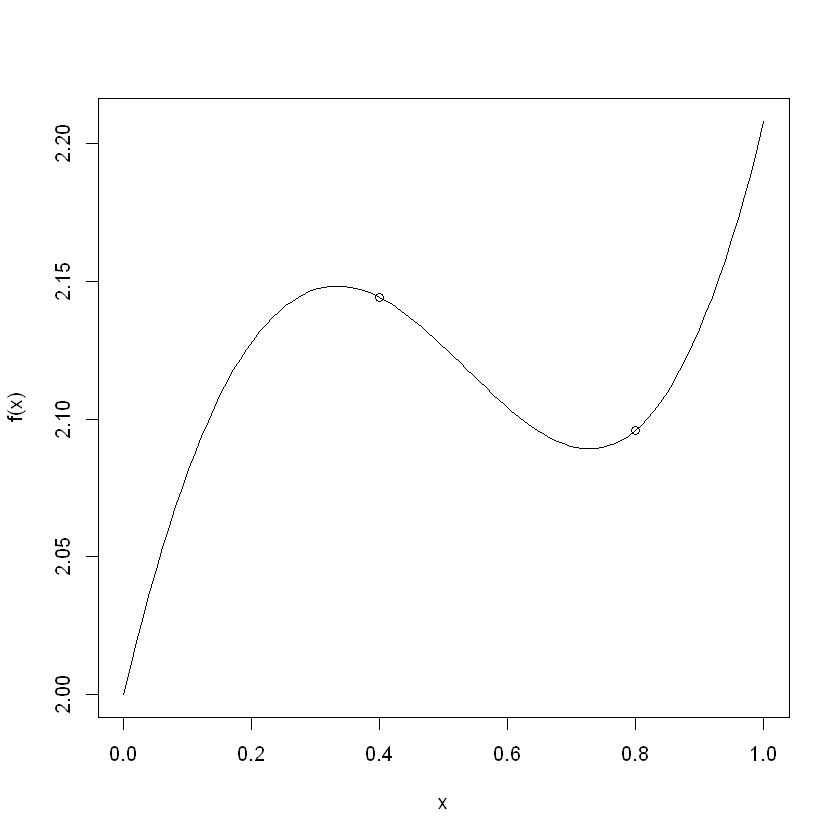

In [178]:
x = seq(0,1,length.out = 100)
f = function(x) {2 + x - 2*x^2 + x^3 + (x-0.4)^3 * ((x-0.4)>0) - (x-0.8)^3 * ((x-0.8)>0)}
plot(x,f(x), type="l")
points(0.4, f(0.4))
points(0.8, f(0.8))

### Penalized splines

- Estimation using spline regressions is very sentitive to the choices of the number knots and their positions
- More kots implies a smoother function: so too much knots would lead to overfitting and not enougth knots would lead to underfitting the data
- The choice of knots position directly affects the shape of the estimated function
- Several methods emerge in the litterature to adress this issue: often based on greedy search algorithms, they are very costly computationaly
- So, another method has been extensively use: penelized regression
- The criterion to be minimized is:
$$
\displaystyle \sum_{i=1}^{n} [y_i - f(x_i)]^2 + \lambda \int_x [f''(x)]^2 dx = \sum_{i=1}^{n} [y_i - f(x_i)]^2 + \lambda \beta^T S \beta,
$$
where $f''$ is the second order derivative of $f$, $\lambda$ the penelization term, $S$ a positive semi-definite matrix which structure can be defined using some predefined constraints.
- Using matrix notations where $X = [b_1(x,\kappa), b_2(x,\kappa), \dots, b_r(x,\kappa)]$:
   $f(x) = \displaystyle \sum_{j=1}^{r} b_j(x, \kappa_j) \beta_j = X\beta$
   
- So : $\hat{\beta} = (X^TX + \lambda S)^{-1}y$

- This is very similar to a Ridge regression
- $\lambda$ can be choosen using cross-validation 

### An application with the Phillips curve

We use here data from the Federal Bank of Saint-Louis about unemployment and inflation rates from January 1948 to December 1969.

$$
y = f(x) + \epsilon,
$$
with $y$ the inflation rate and $x$ the unemployment rate.

In [188]:
df = read.csv("fredgraph.csv")[1:264,]
head(df)

DATE,UNRATE,CPIAUCSL_PC1
1948-01-01,3.4,10.24209
1948-02-01,3.8,9.48196
1948-03-01,4.0,6.81818
1948-04-01,3.9,8.27273
1948-05-01,3.5,9.38497
1948-06-01,3.6,9.37500


In [189]:
tail(df)

,DATE,UNRATE,CPIAUCSL_PC1
259,1969-07-01,3.5,5.44413
260,1969-08-01,3.5,5.42857
261,1969-09-01,3.7,5.69801
262,1969-10-01,3.7,5.66572
263,1969-11-01,3.5,5.93220
264,1969-12-01,3.5,5.89888


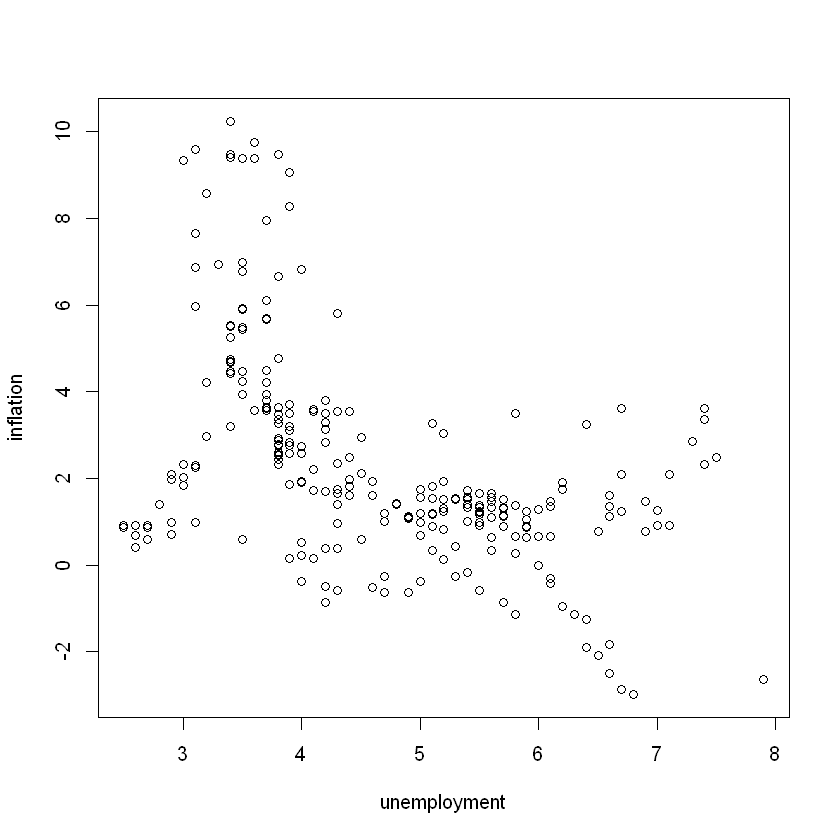

In [257]:
x = df$UNRATE
y = df$CPIAUCSL_PC1

plot(x, y, xlab="unemployment",ylab="inflation")

###### Splines without penalization

Let us modelize the relationship between $x$ and $y$ using a polynomial cubic basis with one knot $\kappa=4$.

In [264]:
b1 = 1; b2 = x; b3 = x^2; b4=x^3; b5 = ((x-4)^3)*((x - 4)>0) 

splines = lm(y ~ 1 + b2 + b3 + b4 + b5)
summary(splines)


Call:
lm(formula = y ~ 1 + b2 + b3 + b4 + b5)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3829 -1.0326  0.0866  0.7046  5.5390 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -230.4946    25.7206  -8.961  < 2e-16 ***
b2           190.5495    20.9857   9.080  < 2e-16 ***
b3           -50.5126     5.6121  -9.001  < 2e-16 ***
b4             4.3693     0.4926   8.870  < 2e-16 ***
b5            -4.6592     0.5595  -8.327 4.85e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.769 on 259 degrees of freedom
Multiple R-squared:  0.4781,	Adjusted R-squared:   0.47 
F-statistic: 59.31 on 4 and 259 DF,  p-value: < 2.2e-16


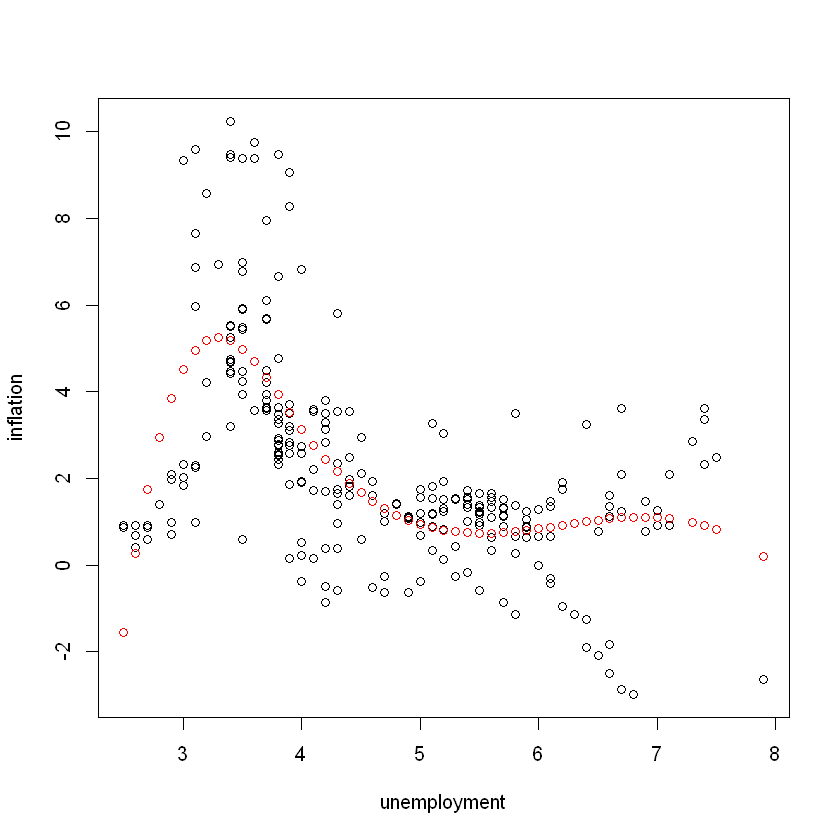

In [268]:
plot(x, y , xlab="unemployment",ylab="inflation")
lines(x,splines$fitted.values,col="red", type="p")

In practice, the cubic splines are constrained to satisfy some predefined conditions. For more details take a look at this [tutorial](http://www.maths.lth.se/na/courses/FMN081/FMN081-06/lecture11.pdf). These conditions are necessary to define the matrix $S$ for penalized splines.

## The multivariate case

In the multivariace case with $k$ variables:
$$
f(x) = f(x_1, x_2, \dots, x_k)
$$

- As splines are an interpolating method the number of data points needed to get relieable estimation of $f$ increases exponentially with $k$: the curse of dimensionality
- To avoid such a problem, if it is reasonable, one can make an *additive* assumption :
    - on some variables if they are a priori independent : if $k=3$, and only $x_1$ and $x_2$ are linked then
        $f(x) = f_{12}(x_1,x_2) + f_3(x_3)$
        
    - or on every variables if there are all independent: $f(x) = f_1(x_1) + f_2(x_2) + f_3(x_3)$
 
- Using the additive assumption we arrive to *Additive Models* 


### Estimating Additive Models

Let us consider the case where $k=2$ and $y = f(x) + \epsilon = f_1(x_1) + f_2(x_2) + \epsilon$:

$$
f_1(x_1) = \beta_0^{(1)} + \beta_1^{(1)} x_1 + \dots + \beta_p^{(1)} x_1^p + \displaystyle \sum_{j=1}^{q_1} \beta_{p+j}^{(1)} (x_1-\kappa_j^{(1)})^p_+. \\
f_2(x_2) = \beta_0^{(2)} + \beta_1^{(2)} x_2 + \dots + \beta_p^{(2)} x_2^p + \displaystyle \sum_{j=1}^{q_2} \beta_{p+j}^{(2)} (x_2-\kappa_j^{(2)})^p_+,
$$


where $q_l$ is the number of knots of the smooth function $f_l$; $\kappa_j^{(l)}$ is the $j^{th}$ knot position of $f_l$. 

To estimate $f_1$ and $f_2$ we need an identifiability constraint. Wood (2004) suggested the following constraint $\beta_0^{(2)}=0$. 

So, the model can be rewritten as follows: $y = X\beta + \epsilon$ where
$X = [1, x_1, x_1^2, \dots, x_1^p,  (x_1-\kappa_1^{(1)})^p_+, \dots, (x_1-\kappa_{q_1}^{(1)})^p_+, x_2, x_2^2, \dots, x_2^p,  (x_2-\kappa_1^{(2)})^p_+, \dots, (x_2-\kappa_{q_2}^{(2)})^p_+]$

and $\beta$ a vector containing all the scalar parameters.

This model can be estimated using penelized least squares:
$$ 
||y-X\beta||^2 + \lambda_1\beta^T S_1 \beta + \lambda_2 \beta^T S_2 \beta,
$$

where $\lambda_1$ and $\lambda_2$ are respectively controlling for the degree of smoothness of $f_1$ and $f_2$; $S_1$ and $S_2$ are positive semi-definite matrices (defined according to constraints on the spline basis). 


Additve models can also be iteratively estimated. Let us consider the simple case of two independent covariates $k=2$: $ y = f_1(x_1) + f_2(x_2) + \epsilon.$
Using conditional expectations:

$$
E(y-f_2(x_2)|x_1) = f_1(x_1),\\
E(y-f_1(x_1)|x_2) = f_2(x_2).
$$

Step 1: Initializing $\hat{f}_1^{(0)}$ and $\hat{f}_2^{(0)}$ with arbitrary choices 

Step 2: Getting $\hat{f_1^{(i)}}$ from the regression $y - \hat{f}_2^{(i-1)}(x_2) = f_1^{(i)}(x_1) + \epsilon_1$ 

Step 3: Getting $\hat{f_2^{(i)}}$ from the regression $y - \hat{f}_1^{(i-1)}(x_1) = f_2^{(i)}(x_2) + \epsilon_2$ 

Step 4: Repeating steps 2 and 3 until convergence.

This algorithm can be generalized for $k>2$. 


##### NB: In the case we want to estimate smooth funcrions accounting for interactions such as $f_{12}(x_1,x_2)$ we can simply use the product of $x_1$ and $x_2$ as input: $f_{12}(x_1,x_2) = f_{12}(x_1 \times x_2)$. See Wood (2004) on *tensor product smooths* for further details.


### Estimating Generalized Additive Models (GAM)

A GAM is simply an additive model possibly followed by a linear predictor: 

$$
y = X_l\beta + f(X_{nl}) + \epsilon,
$$
where  $X_l$ is the matrix loaded with linear predictors and $X_nl$ the one loaded with non-linear predictors; $f(X_{nl})$ can be additively decomposed. This is a semi-parametric model.

There are several ways to estimate GAMs, however there are generally iterative methods possibly using (penalized) least squares or maximum likelihood in the back end. 

Here we briefly explain one of these methods exposed in Ahmada and Flachaire (2008): Double Residual Estimator (DRE).

##### DRE presentation 
We assume iid noises: $E(\epsilon| X_l, X_{nl}) = 0$ and $V(\epsilon| X_l, X_{nl}) = \sigma_{\epsilon}^2$.

Then:
$$
E(y|X_{nl}) = E(X_l|X_{nl})\beta + f(Z).
$$

So:
$$
y - E(y|X_{nl}) = [X - E(X_l|X_{nl})]\beta + \epsilon. \text{    (a)}
$$

Robinson (1988) suggested to firstly estimates the conditional expectations $E(y|X_{nl}) $ and $E(X_l|X_{nl})$ by non-parametric methods followed by an OLS estimation to get $\beta$.

$$
y = f_y(Z) + \epsilon_y \\
X_l = f_{X_l}(Z) + \epsilon_{X_l},
$$
where $f_y(Z) = E(y|X_{nl})$ and $ f_{X_l}(Z) = E(X_l|X_{nl})$.

Then equation (a) can be estimated as : $ \epsilon_y = \epsilon_{X_l}\beta + \epsilon.$

Hence: $\hat{\beta} = (\epsilon_{X_l}^T \epsilon_{X_l})^{-1}\epsilon_{X_l} \epsilon_y \sim N(\beta, \dfrac{\sigma_{\epsilon}^2}{n\sigma_{\epsilon_{X_l}}})$

Once $\hat{\beta}$ is known, we can estimate $f(X_{nl})$ with the following model:
$$
y - X_l \hat{\beta} = f(X_{nl}) + \epsilon
$$


The [Mixed GAM Computation Vehicle with Automatic Smoothness Estimation (MGCV)](https://www.rdocumentation.org/packages/mgcv/versions/1.8-33) is the most known package in R for GAM estimation.

### A Semi-parametric GAM application 

Let us use the [Boston](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) dataset to estimate a semi-parametric GAM. 

In [273]:
library(MASS)

head(Boston)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


- crim:	per capita crime rate by town
- zn:	proportion of residential land zoned for lots over 25,000 sq.ft
- indus:	proportion of non-retail business acres per town
- chas:	Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- nox:	nitric oxides concentration (parts per 10 million)
- rm:	average number of rooms per dwelling
- age:	proportion of owner-occupied units built prior to 1940
- dis:	weighted distances to five Boston employment centres 
- rad:	index of accessibility to radial highways
- tax:	full-value property-tax rate per USD 10,000
- ptratio:	pupil-teacher ratio by town
- black:	$1000(B - 0.63)^2$ where B is the proportion of blacks by town
- lstat:	percentage of lower status of the population
- medv:	median value of owner-occupied homes in USD 1000's

The target variable is medv. Here we are going to only use 4 regressors to predict medv: crim, rm, age and tax. We are going to assume first that:
 - crim and age respectively impact medv in a non-linear way,
 - rm and tax are tied and non-linearly impact medv.
 
We then arrive to the following additive model:

$$
medv = f_1(crim) + f_2(age) + f_{34}(rm, tax) + \epsilon
$$

Let us estimate this equation with the MGCV package using the $natural cubic splines$ with 5 knots for each smooth function. 

##### NB: Natural cubic splines are a particular cubic splines with some predefined constraints. For more details take a look at this [tutorial](http://www.maths.lth.se/na/courses/FMN081/FMN081-06/lecture11.pdf). 

In [295]:
library(mgcv)

gam.model = gam(medv~ s(crim,  bs = 'cr', k=5) + s(age, bs = 'cr', k=5) + te(rm, tax, bs = 'cr', k=5), data=Boston)
summary(gam.model)



Family: gaussian 
Link function: identity 

Formula:
medv ~ s(crim, bs = "cr", k = 5) + s(age, bs = "cr", k = 5) + 
    te(rm, tax, bs = "cr", k = 5)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    22.53       0.21   107.3   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
              edf Ref.df     F  p-value    
s(crim)     2.898  2.995 24.26 4.50e-14 ***
s(age)      1.000  1.000 27.76 2.04e-07 ***
te(rm,tax) 13.435 16.045 58.62  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.736   Deviance explained = 74.5%
GCV = 23.143  Scale est. = 22.304    n = 506

- edf: Effective degrees of freedom. In a pure OLS regression, this refers to the number of regressors. In GAMs, the edf is not trivial as smooth functions are penalized. The edf lies between 1 and $q-1$, if $q$ is the number of knots. When edf =1, then the smooth term is penalized to a simple linear relationship,
-  Ref.df: reference degrees of freedom used in computing test statistic and the p-values. There are not useful according to Simon Wood as the null distributions are non-standard,
- GCV: Generalized Cross Validation score, is an estimate of the Mean Square Error (MSE) using a leave-one-out cross validation estimation,

- Deviance explained: Unadjusted $R^2$.

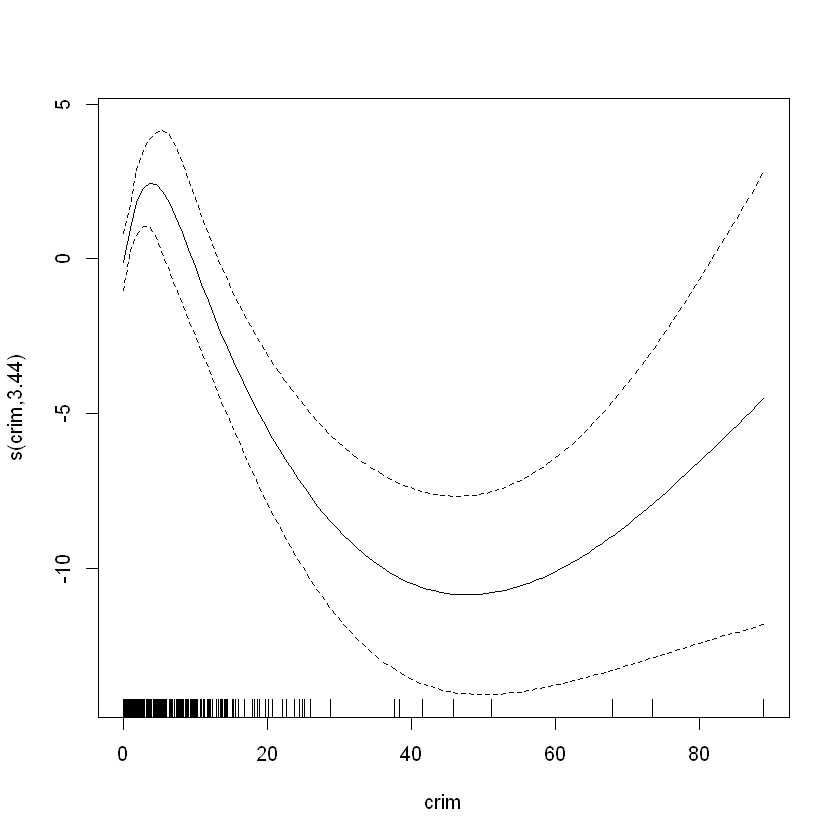

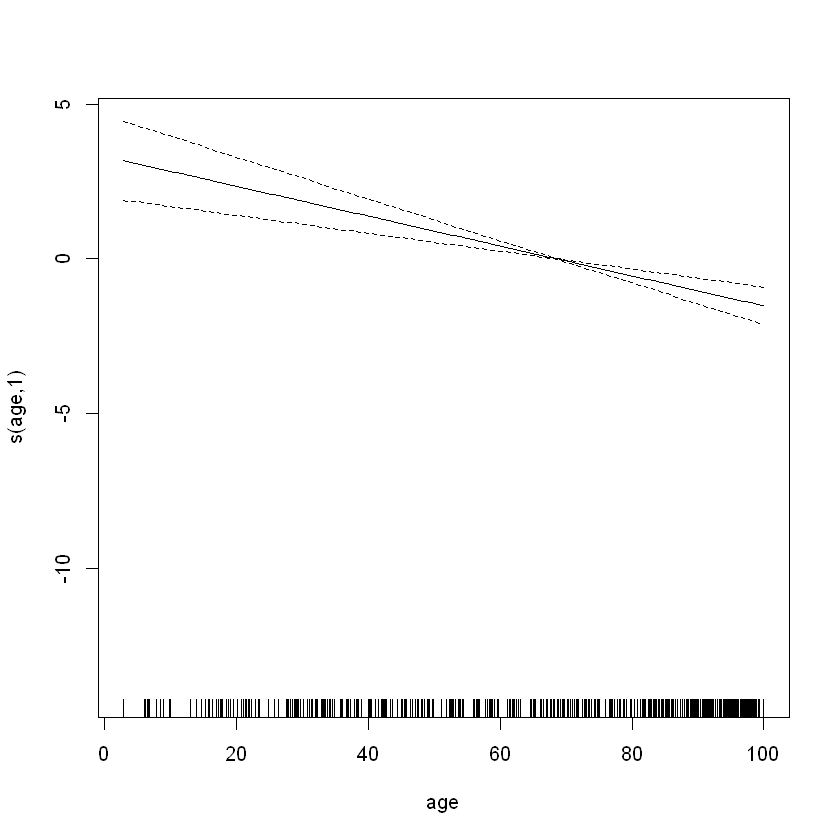

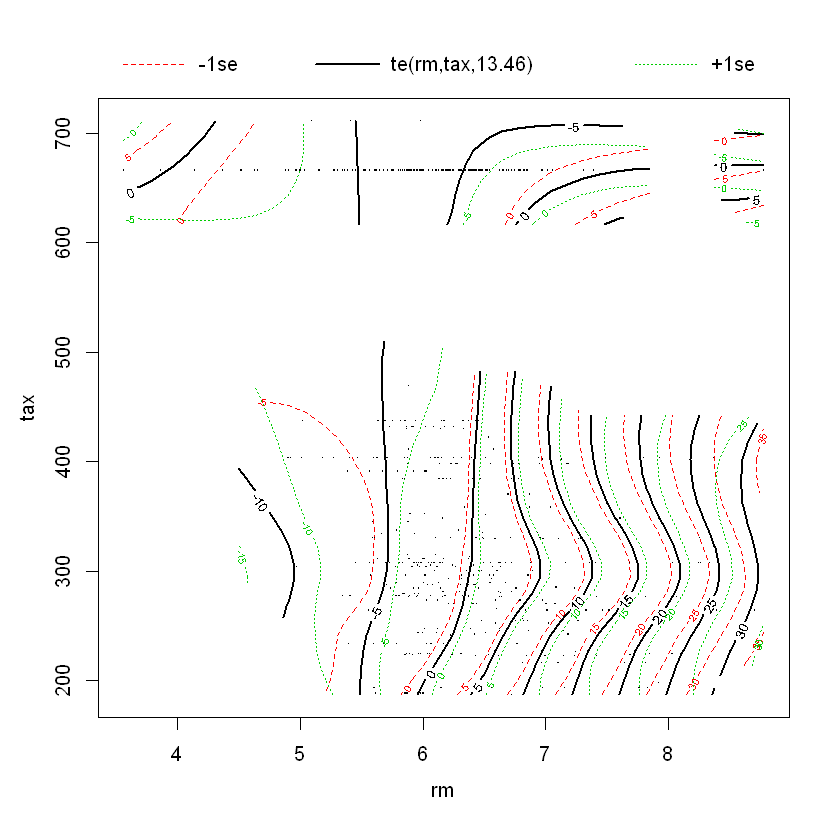

In [286]:
plot(gam.model)

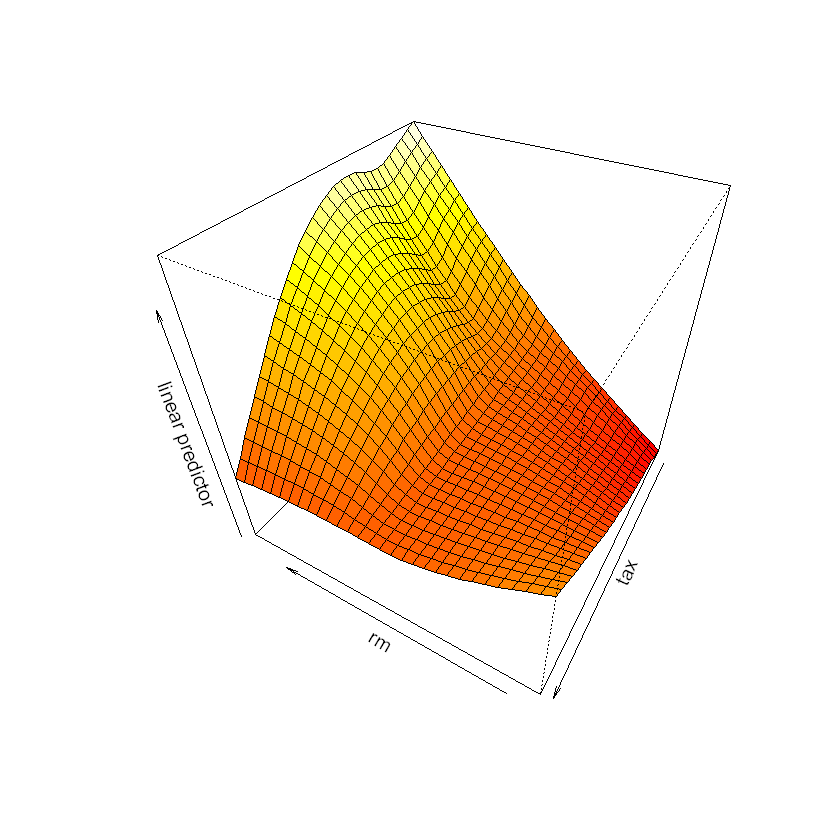

In [289]:
vis.gam(gam.model, view=c("rm","tax"), theta=210,phi=40)

As age seems to be linearly linked to medv, we can restrict the first model as follows:

$$
medv = \beta. age + f_1(crim) + f_{23}(rm, tax) + \epsilon
$$


In [291]:
gam.model = gam(medv~ age + s(crim,  bs = 'cr') + te(rm, tax, bs = 'cr'), data=Boston)
summary(gam.model)


Family: gaussian 
Link function: identity 

Formula:
medv ~ age + s(crim, bs = "cr") + te(rm, tax, bs = "cr")

Parametric coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 25.849058   0.697905  37.038  < 2e-16 ***
age         -0.048360   0.009706  -4.982 8.74e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
              edf Ref.df     F  p-value    
s(crim)     3.444  3.765 18.60 1.76e-13 ***
te(rm,tax) 13.464 16.071 58.62  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.736   Deviance explained = 74.6%
GCV = 23.154  Scale est. = 22.289    n = 506

# Bibliography

- Wood, S. N. (2017). Generalized additive models: an introduction with R. CRC press.
- Harrison Jr, D., & Rubinfeld, D. L. (1978). Hedonic housing prices and the demand for clean air.